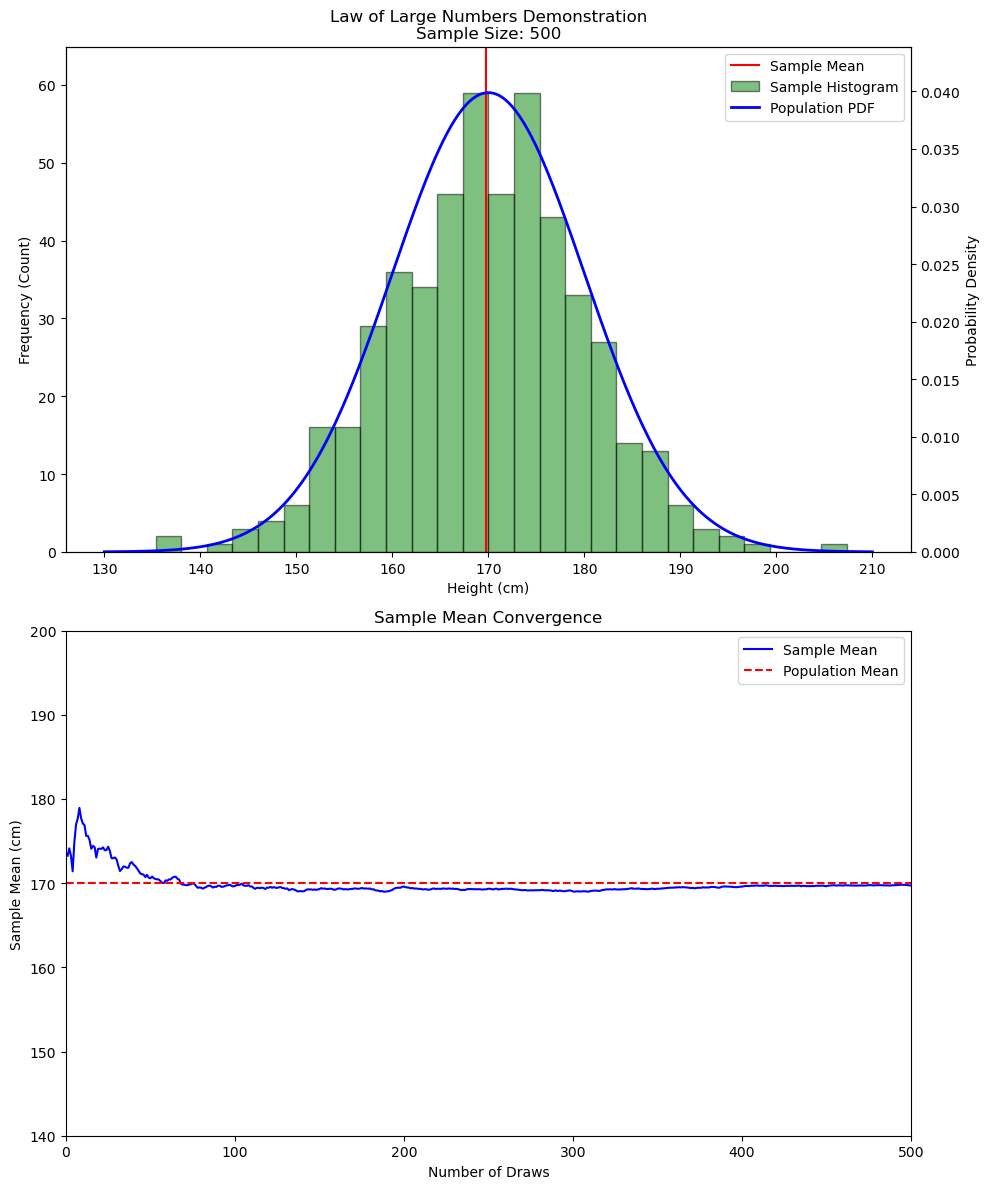

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm
from matplotlib.animation import FFMpegWriter

# Population parameters
mu = 170  # Mean height in cm
sigma = 10  # Standard deviation in cm

# X values for plotting the population PDF
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 400)
y = norm.pdf(x, mu, sigma)  # Population PDF values

# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Initialize the histogram parameters
n_bins = 30
hist_bins = np.linspace(mu - 4 * sigma, mu + 4 * sigma, n_bins + 1)

# Plot the initial empty histogram on the first subplot
hist_patches = ax1.bar(
    hist_bins[:-1],
    np.zeros(n_bins),
    width=np.diff(hist_bins),
    align="edge",
    color="green",
    alpha=0.5,
    label="Sample Histogram",
    edgecolor="black",
)

# Initialize the sample mean line on the first subplot
sample_mean_line = ax1.axvline(x=mu, color="red", label="Sample Mean")

# Create a twin y-axis sharing the same x-axis
ax1_twin = ax1.twinx()

# Plot the population PDF on the twin axis
pdf_line, = ax1_twin.plot(x, y, color="blue", label="Population PDF", linewidth=2)

# Set y-axis labels
ax1.set_xlabel("Height (cm)")
ax1.set_ylabel("Frequency (Count)")
ax1_twin.set_ylabel("Probability Density")

# Set fixed y-limits for the PDF axis
ax1_twin.set_ylim(0, max(y) * 1.1)

# Dynamic title for the first subplot
title1 = ax1.set_title("Law of Large Numbers Demonstration\nSample Size: 0")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

# Initialize the list to store sample data and sample means
sample_data = []
sample_means = []

# Initialize the second subplot
ax2.set_xlabel("Number of Draws")
ax2.set_ylabel("Sample Mean (cm)")
ax2.set_title("Sample Mean Convergence")

# Initialize the line for sample means on the second subplot
mean_line, = ax2.plot([], [], color="blue", label="Sample Mean")

# Plot the population mean as a horizontal red line on the second subplot
pop_mean_line = ax2.axhline(y=mu, color="red", linestyle="--", label="Population Mean")

# Set x and y limits for the second subplot
ax2.set_xlim(0, 500)
ax2.set_ylim(mu - 3 * sigma, mu + 3 * sigma)

# Add a legend to the second subplot
ax2.legend()

# Number of samples to draw per frame
samples_per_frame = 1

# Animation function that updates the plots
def animate(frame_number):
    global sample_data

        # Check if the sample size reaches 500
    if len(sample_data) >= 500:
        ani.event_source.stop()  # Stop the animation when sample size reaches 500
        return
    
    
    # Draw a new random sample from the population distribution
    new_sample = np.random.normal(mu, sigma, samples_per_frame)
    sample_data.extend(new_sample)

    # Compute the histogram of the sample data without density normalization
    counts, _ = np.histogram(sample_data, bins=hist_bins, density=False)

    # Update histogram heights on the first subplot
    for rect, h in zip(hist_patches, counts):
        rect.set_height(h)

    # Update the y-axis for the histogram dynamically
    ax1.set_ylim(0, max(counts) * 1.1)

    # Compute and update the sample mean line position on the first subplot
    sample_mean = np.mean(sample_data)
    sample_mean_line.set_xdata([sample_mean, sample_mean])

    # Update the title with the current sample size
    title1.set_text(f"Law of Large Numbers Demonstration\nSample Size: {len(sample_data)}")

    # Update the sample means list and plot on the second subplot
    sample_means.append(sample_mean)
    mean_line.set_data(range(1, len(sample_means) + 1), sample_means)

    # Adjust x-axis limits of the second subplot if necessary
    if len(sample_means) > ax2.get_xlim()[1]:
        ax2.set_xlim(0, len(sample_means) + 10)

    # Return updated artists
    return hist_patches + (sample_mean_line, title1, mean_line)

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, frames=500, interval=5, blit=False
)

# Save the animation as a GIF
ani.save("animation.gif", writer="pillow")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
